In [ ]:
import pandas as pd
import numpy as np

#의료수요 및 공급지표

##조정계수

: Coulter의 조정계수로 하나의 시·도 내에서 시·군·구별 자원 분포의 차이점 파악 가능한 지표 \

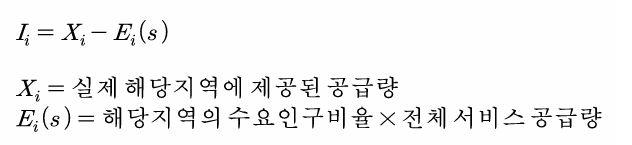

X: 세종시 동별 소아과 의원 수


E(s): 동별 어린이 인구 수/동별 전체 인구 수 * 세종시 전체소아과 의원 수

##X: 세종시 동별 소아과 의원 수

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/nabis/소아과 주소.csv')

df.head()

,의료기관명,의료기관 분류,의료기관 주소,district,Latitude,Longitude
0,아름드리나무 어린이병원,소아과,세종특별자치시 보듬3로 101,아름동,36.511399,127.248417
1,코난소아청소년과의원,소아과,세종특별자치시 남세종로 73,집현동,36.480141,127.301462
2,꿈담소아청소년과의원,소아과,세종특별자치시 마음로 264,고운동,36.519328,127.234660
3,손근형소아청소년과의원,소아과,세종특별자치시 나성북로 30,나성동,36.490171,127.259425
4,윤빛소아청소년과의원,소아과,세종특별자치시 해밀3로 43,해밀동,36.528845,127.264985


In [ ]:
#동별 소아과 수 cnt
df.groupby('district').count()

,의료기관명,의료기관 분류,의료기관 주소,Latitude,Longitude
district,,,,,
고운동,2,2,2,2,2
나성동,3,3,3,3,3
다정동,4,4,4,4,4
도담동,1,1,1,1,1
반곡동,1,1,1,1,1
보람동,2,2,2,2,2
새롬동,2,2,2,2,2
소담동,5,5,5,5,5
아름동,5,5,5,5,5


In [ ]:
#동별 소아과 수 매핑하여 pediatric_df 구성
cnt = {
    '고운동': 2,
    '나성동': 3,
    '다정동': 4,
    '도담동': 1,
    '반곡동': 1,
    '보람동': 2,
    '새롬동': 2,
    '소담동': 5,
    '아름동': 5,
    '조치원읍': 1,
    '종촌동': 3,
    '집현동': 1,
    '해밀동': 1
}

data = {dis: cnt.get(dis, 0) for dis in district}

pediatric_df = pd.DataFrame.from_dict(data, orient='index', columns=['pediatric_cnt'])
pediatric_df

,pediatric_cnt
조치원읍,1
연기면,0
연동면,0
부강면,0
금남면,0
장군면,0
연서면,0
전의면,0
전동면,0
소정면,0


In [ ]:
#세종시 전체 소아과 수 = 30개
total_pediatric= pediatric_df.sum()
total_pediatric

,0
pediatric_cnt,30


##E(s): 세종시 동별 어린이 인구 수 / 동별 전체 인구 수

In [ ]:
#동별 전체 인구 데이터
human=pd.read_csv("/content/drive/MyDrive/nabis/세종시_연령인구.csv")
human=human.drop(columns=['연령','Unnamed: 1','세종특별자치시']).iloc[0]
human.columns=['전체 인구수']

df=pd.concat([summed_df,pediatric_df,human],axis=1)
df.columns=['어린이인구수','소아과수','전체 인구수']
df

,어린이인구수,소아과수,전체 인구수
조치원읍,5564,1,"40,298"
연기면,119,0,"2,407"
연동면,140,0,"2,752"
부강면,440,0,"5,389"
금남면,514,0,"8,224"
장군면,369,0,"6,534"
연서면,524,0,"6,728"
전의면,373,0,"5,108"
전동면,139,0,"3,091"
소정면,168,0,"2,063"


In [ ]:
#숫자형으로 타입변환
df['어린이인구수']=pd.to_numeric(df['어린이인구수'], errors='coerce').astype(int)
df['전체 인구수']=df['전체 인구수'].str.replace(',','').astype(int).tolist()

In [ ]:
#E(s)=(동별 어린이 인구 수/동별 전체 인구 수) * 세종시 전체소아과 의원 수
E=pd.DataFrame(df['어린이인구수']/df['전체 인구수']*30) #total_pediatric
E.columns=['E(s)']
E

,E(s)
조치원읍,4.142141
연기면,1.483174
연동면,1.526163
부강면,2.449434
금남면,1.875000
장군면,1.694215
연서면,2.336504
전의면,2.190681
전동면,1.349078
소정면,2.443044


In [ ]:
df=pd.concat([df,E],axis=1)
df

,어린이인구수,소아과수,전체 인구수,E(s)
조치원읍,5564,1,40298,4.142141
연기면,119,0,2407,1.483174
연동면,140,0,2752,1.526163
부강면,440,0,5389,2.449434
금남면,514,0,8224,1.875000
장군면,369,0,6534,1.694215
연서면,524,0,6728,2.336504
전의면,373,0,5108,2.190681
전동면,139,0,3091,1.349078
소정면,168,0,2063,2.443044


##최종 조정계수 I 값 산출

In [ ]:
df['I']=df['소아과수']-df['E(s)']
df

,어린이인구수,소아과수,전체 인구수,E(s),I
조치원읍,5564,1,40298,4.142141,-3.142141
연기면,119,0,2407,1.483174,-1.483174
연동면,140,0,2752,1.526163,-1.526163
부강면,440,0,5389,2.449434,-2.449434
금남면,514,0,8224,1.875000,-1.875000
장군면,369,0,6534,1.694215,-1.694215
연서면,524,0,6728,2.336504,-2.336504
전의면,373,0,5108,2.190681,-2.190681
전동면,139,0,3091,1.349078,-1.349078
소정면,168,0,2063,2.443044,-2.443044


In [ ]:
#인구 데이터와 합치기
final=pd.concat([final,df['I']],axis=1)
final

,어린이인구수,조출생율,I
조치원읍,5564,2.977815,-3.142141
연기면,119,3.323639,-1.483174
연동면,140,2.180233,-1.526163
부강면,440,0.742253,-2.449434
금남면,514,1.459144,-1.875000
장군면,369,1.224365,-1.694215
연서면,524,2.229489,-2.336504
전의면,373,1.174628,-2.190681
전동면,139,0.647040,-1.349078
소정면,168,0.969462,-2.443044


In [ ]:
final.to_csv('세종시_어린이인구수_조출생율_조정계수.csv')